In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

## Design Idea

(2857, 3058, 3)


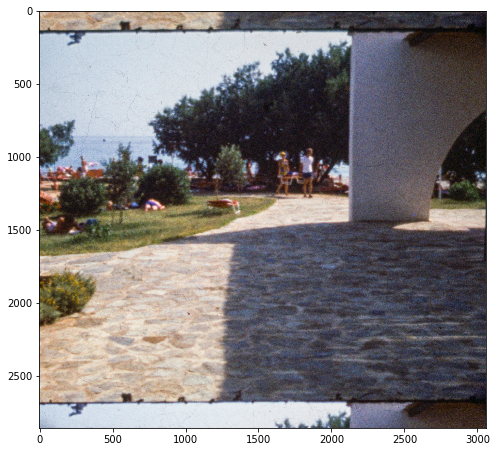

In [36]:
imgpath = "/Users/jankaiser/Desktop/stab_test/frame-00702.jpg"
img = cv2.imread(imgpath, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img, interpolation="none")
plt.show()

(2857, 3058, 3)


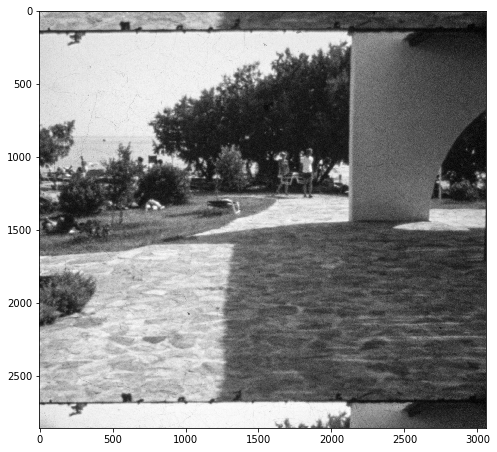

In [37]:
bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img.shape)

plt.figure(figsize=(8,8))
plt.imshow(bw, cmap="gray", interpolation="none")
plt.show()

133.5 2673.5


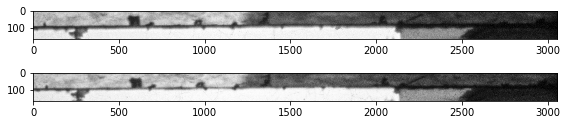

In [38]:
middle = bw.shape[0] / 2
width = 1270
offset = -25
upper = middle - width + offset
lower = middle + width + offset
slice_heigth = 161

print(upper, lower)

upper_slice = bw[int(upper-slice_heigth/2):int(upper+slice_heigth/2),:]
lower_slice = bw[int(lower-slice_heigth/2):int(lower+slice_heigth/2),:]

plt.figure(figsize=(8,2))
plt.subplot(211)
plt.imshow(upper_slice, cmap="gray", interpolation="none")
plt.subplot(212)
plt.imshow(lower_slice, cmap="gray", interpolation="none")
plt.tight_layout()
plt.show()

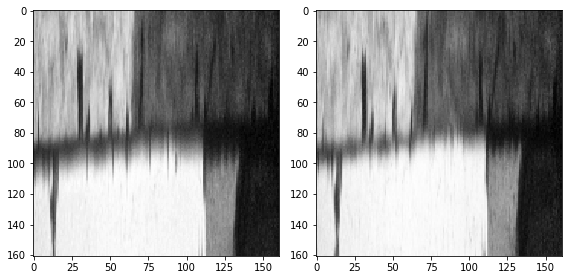

In [39]:
upper_squashed = cv2.resize(upper_slice, (161,161))
lower_squashed = cv2.resize(lower_slice, (161,161))

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(upper_squashed, cmap="gray", interpolation="none")
plt.subplot(122)
plt.imshow(lower_squashed, cmap="gray", interpolation="none")
plt.tight_layout()
plt.show()

## Create Training Data

(1335, 2000, 3)


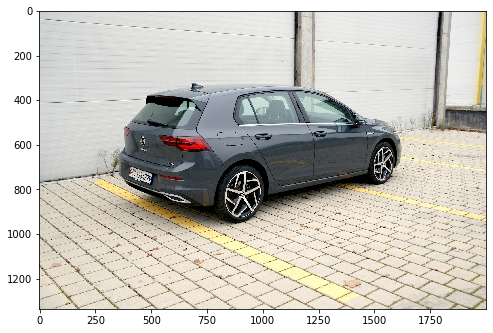

In [40]:
train_img = cv2.imread("/Users/jankaiser/Downloads/@Test-VW-Golf-8-4.jpeg", cv2.IMREAD_COLOR)
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

print(train_img.shape)

plt.figure(figsize=(8,8))
plt.imshow(train_img, interpolation="none")
plt.show()

0.8306082406801831
(1335, 1607, 3)


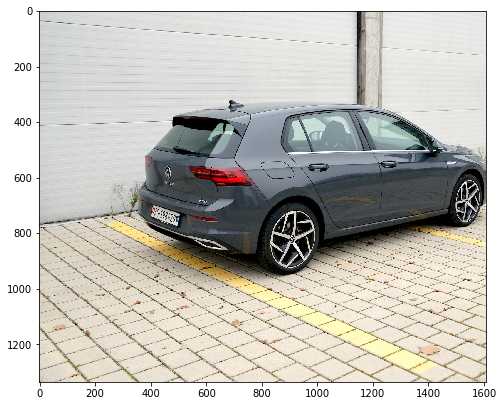

In [70]:
aspect_ratio = width * 2 / img.shape[1]
cropped = train_img[:,:int(train_img.shape[0]/aspect_ratio)]

print(aspect_ratio)
print(cropped.shape)

plt.figure(figsize=(8,8))
plt.imshow(cropped, interpolation="none")
plt.show()

(2540, 3058, 3)


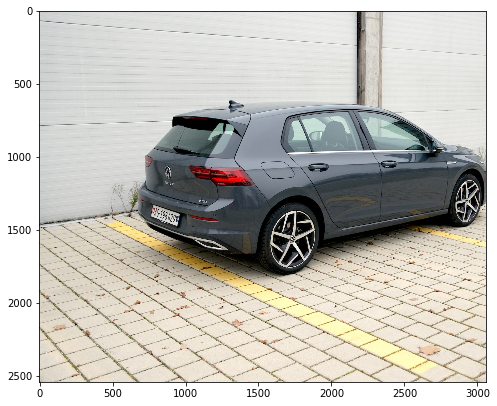

In [73]:
resized = cv2.resize(cropped, (img.shape[1],int(img.shape[1]*aspect_ratio)))

print(resized.shape)

plt.figure(figsize=(8,8))
plt.imshow(resized, interpolation="none")
plt.show()

133
-2427 113
2683 174


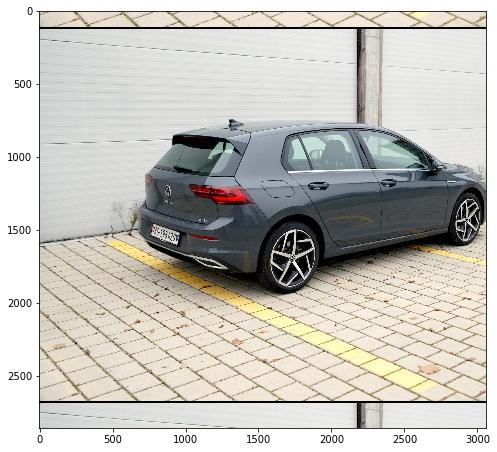

In [78]:
ypos = int((img.shape[0] - resized.shape[0]) / 2 + offset)
print(ypos)

canvas = np.zeros_like(img)
canvas[ypos:ypos+resized.shape[0]] = resized

uypos = ypos - resized.shape[0] - 20
uheight = uypos + resized.shape[0]
canvas[0:uheight] = resized[-uheight:]
print(uypos, uheight)

lypos = ypos + resized.shape[0] + 10
lheight = canvas.shape[0] - lypos
canvas[-lheight:] = resized[:lheight]
print(lypos, lheight)

plt.figure(figsize=(8,8))
plt.imshow(canvas, interpolation="none")
plt.show()

(2857, 3058, 3)


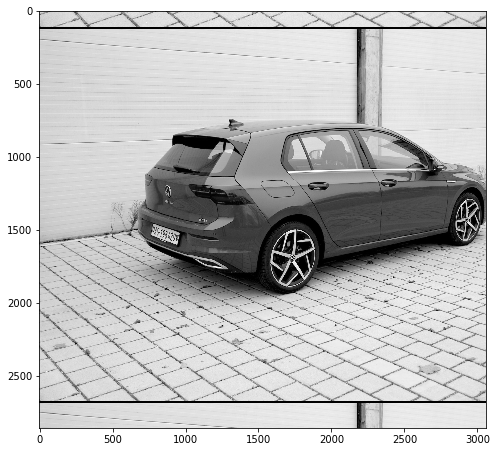

In [79]:
bw = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)

print(img.shape)

plt.figure(figsize=(8,8))
plt.imshow(bw, cmap="gray", interpolation="none")
plt.show()

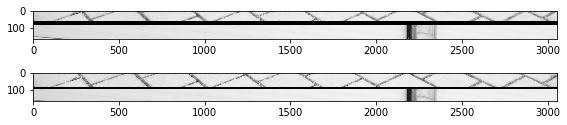

In [80]:
upper_slice = bw[int(upper-slice_heigth/2):int(upper+slice_heigth/2),:]
lower_slice = bw[int(lower-slice_heigth/2):int(lower+slice_heigth/2),:]

plt.figure(figsize=(8,2))
plt.subplot(211)
plt.imshow(upper_slice, cmap="gray", interpolation="none")
plt.subplot(212)
plt.imshow(lower_slice, cmap="gray", interpolation="none")
plt.tight_layout()
plt.show()

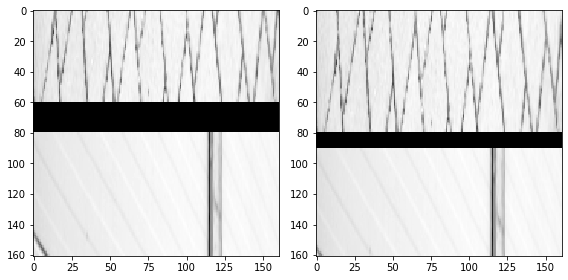

In [81]:
upper_squashed = cv2.resize(upper_slice, (161,161))
lower_squashed = cv2.resize(lower_slice, (161,161))

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(upper_squashed, cmap="gray", interpolation="none")
plt.subplot(122)
plt.imshow(lower_squashed, cmap="gray", interpolation="none")
plt.tight_layout()
plt.show()

## Train

In [19]:
model = keras.Sequential([
    Conv2D(16, (5,25), strides=(1,7), activation="relu", input_shape=(161,161,2)),
    Conv2D(8, (3,15), strides=(1,1), activation="relu"),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(1)
])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 157, 20, 16)       4016      
                                                                 
 conv2d_35 (Conv2D)          (None, 155, 6, 8)         5768      
                                                                 
 flatten_17 (Flatten)        (None, 7440)              0         
                                                                 
 dense_34 (Dense)            (None, 32)                238112    
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 247,929
Trainable params: 247,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

## Generate Stabilised Video